# Unwrapping the Big Mac Index

COGS 9 Final Project

### Importing Python Packages

In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr

### Importing Data

In [2]:
big_mac_prices= pd.read_csv('/work/big-mac-source-data.csv')
bread_prices= pd.read_csv('bread.csv')
beef_prices=pd.read_csv('ground beef.csv')
cheese_prices=pd.read_csv('cheese.csv')
inflation= pd.read_csv('inflation.csv')
cucumber_prices= pd.read_csv('cucumber.csv')
lettuce_prices=pd.read_csv('lettuce_new.csv')
onion_prices=pd.read_csv('onions.csv')
min_wage=pd.read_csv('minwage.csv')
gdp=pd.read_csv('GDP.csv')

In [3]:
spy=dr.data.get_data_yahoo('SPY',start='2000-01-01', end='2020-12-31')

In [58]:
#Importing the McDonald's stock
mcd=dr.data.get_data_yahoo('MCD',start='2000-01-01', end='2020-12-31')

### Data Wrangling/Cleaning

In [4]:
#Function to extract year from date.
date_formatter= lambda date: int(date.split('-')[0])

In [5]:
#Taking only Big Mac Prices within the United States into account
us_big_mac_prices=big_mac_prices[big_mac_prices.get('name')=='United States']
us_big_mac_prices

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
27,United States,USA,USD,2.510000,1.0,NaN,2000-04-01
55,United States,USA,USD,2.540000,1.0,NaN,2001-04-01
87,United States,USA,USD,2.490000,1.0,NaN,2002-04-01
119,United States,USA,USD,2.710000,1.0,NaN,2003-04-01
158,United States,USA,USD,2.900000,1.0,NaN,2004-05-01
199,United States,USA,USD,3.060000,1.0,NaN,2005-06-01
232,United States,USA,USD,3.150000,1.0,NaN,2006-01-01
272,United States,USA,USD,3.100000,1.0,NaN,2006-05-01
313,United States,USA,USD,3.220000,1.0,NaN,2007-01-01
354,United States,USA,USD,3.410000,1.0,NaN,2007-06-01


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '2020-01-14'),
  Text(0.0, 0, '2000-04-01'),
  Text(5.0, 0, '2005-06-01'),
  Text(10.0, 0, '2008-06-01'),
  Text(15.0, 0, '2012-01-01'),
  Text(20.0, 0, '2014-07-01'),
  Text(25.0, 0, '2017-01-01'),
  Text(30.0, 0, '2019-07-09'),
  Text(35.0, 0, '2022-01-01'),
  Text(40.0, 0, '')])

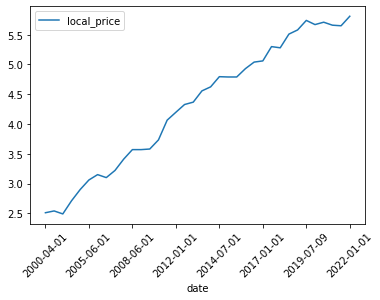

In [6]:
us_big_mac_prices=us_big_mac_prices.get(['name','local_price','date'])
us_big_mac_prices.plot(kind='line',x='date',y='local_price')
#plotting a line graph to sense the increase in prices of big mac over the years. 
plt.xticks(rotation = 45)

In [7]:
#Cleaning the Big Mac Price Dataset
us_big_mac_prices_cleaned=us_big_mac_prices.assign(date=us_big_mac_prices.get('date').apply(date_formatter))
us_big_mac_prices_cleaned=us_big_mac_prices_cleaned.groupby('date').mean()
us_big_mac_prices_cleaned

,local_price
date,
2000,2.510000
2001,2.540000
2002,2.490000
2003,2.710000
2004,2.900000
2005,3.060000
2006,3.125000
2007,3.315000
2008,3.570000


In [8]:
beef_prices_cleaned=beef_prices.assign(date=beef_prices.get('DATE').apply(date_formatter))
beef_prices_cleaned= beef_prices_cleaned.assign(prices=beef_prices_cleaned.get('APU0000703112').apply(lambda price: float(price) if price!='.' else 0))
beef_prices_cleaned=beef_prices_cleaned.groupby('date').mean()
beef_prices_cleaned= beef_prices_cleaned.get(['prices'])
beef_prices_cleaned

,prices
date,
1984,1.287167
1985,1.237500
1986,1.232000
1987,1.309917
1988,1.364750
1989,1.439833
1990,1.587333
1991,1.595083
1992,1.541500


In [9]:
#Cleaning the Onion Price Dataset
onion_prices_cleaned=onion_prices.assign(date=onion_prices.get('Date').apply(lambda name:int('20'+name.split('-')[2])))
onion_prices_cleaned=onion_prices_cleaned[onion_prices_cleaned.get('date')<2050]
onion_prices_cleaned=onion_prices_cleaned.assign(prices=onion_prices_cleaned.get('Value').apply(lambda price:float(price)/112))
onion_prices_cleaned=onion_prices_cleaned.groupby('date').mean()

In [10]:
#Cleaning the Bread Price Dataset
bread_prices_cleaned=bread_prices.assign(date=bread_prices.get('DATE').apply(date_formatter))
bread_prices_cleaned= bread_prices_cleaned.groupby('date').mean()
bread_prices_cleaned

,APU0000702111
date,
1980,0.508750
1981,0.525167
1982,0.532167
1983,0.541583
1984,0.541250
1985,0.553250
1986,0.564667
1987,0.547417
1988,0.612833


In [11]:
#Cleaning the Lettuce Price Dataset
lettuce_prices_cleaned= lettuce_prices.assign(date=lettuce_prices.get('DATE').apply(date_formatter))
lettuce_prices_cleaned= lettuce_prices_cleaned.assign(price=lettuce_prices_cleaned.get('APU0000712211').apply(lambda price: float(price) if price!='.' else 0))
lettuce_prices_cleaned=lettuce_prices_cleaned[lettuce_prices_cleaned.get('price')>0]
lettuce_prices_cleaned= lettuce_prices_cleaned.groupby('date').mean()
lettuce_prices_cleaned

,price
date,
1980,0.452167
1981,0.487417
1982,0.573083
1983,0.553917
1984,0.512583
1985,0.538333
1986,0.527917
1987,0.618300
1988,0.628167


In [12]:
#Cleaning the Cucumber Price Dataset
cucumber_prices_cleaned=cucumber_prices.groupby('date').mean()
cucumber_prices_cleaned

,prices
date,
2000,0.93
2001,0.95
2002,0.98
2003,0.97
2004,0.99
2005,0.94
2006,1.03
2007,1.06
2008,1.09


In [13]:
#Cleaning the Cheese Price Dataset
cheese_prices_cleaned=cheese_prices.assign(date=cheese_prices.get('DATE').apply(date_formatter))
cheese_prices_cleaned= cheese_prices_cleaned.assign(price= cheese_prices_cleaned.get('APU0000710212').apply(lambda price: float(price) if price!='.' else 0))
cheese_prices_cleaned=cheese_prices_cleaned[cheese_prices_cleaned.get('price')>0]
cheese_prices_cleaned=cheese_prices_cleaned.groupby('date').mean()
cheese_prices_cleaned

,price
date,
1984,3.065250
1985,3.093500
1986,3.049083
1987,3.055583
1988,3.164917
1989,3.203556
1991,3.551250
1992,3.569750
1993,3.342167


In [14]:
#Cleaning the Inflation Dataset
inflation_cleaned= inflation.assign(date=inflation.get('DATE').apply(date_formatter))
inflation_cleaned= inflation_cleaned.assign(rate= inflation_cleaned.get('FPCPITOTLZGUSA').apply(lambda price: float(price) if price!='.' else 0))
inflation_cleaned= inflation_cleaned.groupby('date').mean()
inflation_cleaned= inflation_cleaned.get(['rate'])/100
inflation_cleaned

,rate
date,
1960,0.014580
1961,0.010707
1962,0.011988
1963,0.012397
1964,0.012789
...,...
2016,0.012616
2017,0.021301
2018,0.024426


In [15]:
#Cleaning the Minimum Wage Dataset
min_wage_cleaned= min_wage.assign(date=min_wage.get('DATE').apply(date_formatter))
min_wage_cleaned= min_wage_cleaned.assign(prices=min_wage_cleaned.get('FEDMINNFRWG').apply(lambda price: float(price) if price!='.' else 0))
min_wage_cleaned=min_wage_cleaned[min_wage_cleaned.get('prices')>0]
min_wage_cleaned=min_wage_cleaned.groupby('date').mean()
min_wage_cleaned

,FEDMINNFRWG,prices
date,,
1938,0.2500,0.2500
1939,0.2625,0.2625
1940,0.3000,0.3000
1941,0.3000,0.3000
1942,0.3000,0.3000
...,...,...
2018,7.2500,7.2500
2019,7.2500,7.2500
2020,7.2500,7.2500


In [25]:
#Cleaning the Gross Domestic Product Dataset
gdp_clean=gdp.assign(date=gdp.get('DATE').apply(date_formatter))
gdp_clean=gdp_clean.groupby('date').max()
gdp_clean=gdp_clean.assign(change_GDP=gdp_clean.get('GDP').pct_change())
gdp_clean

,DATE,GDP,change_GDP
date,,,
1947,1947-10-01,259.745,NaN
1948,1948-10-01,280.366,0.079389
1949,1949-10-01,275.034,-0.019018
1950,1950-10-01,319.945,0.163293
1951,1951-10-01,356.178,0.113248
...,...,...,...
2017,2017-10-01,19882.965,0.048235
2018,2018-10-01,20813.325,0.046792
2019,2019-10-01,21694.458,0.042335


In [16]:
#Creating a master dataset for easier data visualization
big_mac_cost_df= pd.DataFrame()
big_mac_cost_df=big_mac_cost_df.assign(bun=bread_prices_cleaned[bread_prices_cleaned.index>1999])
big_mac_cost_df=big_mac_cost_df.assign(beef_patty=beef_prices_cleaned[beef_prices_cleaned.index>1999])
big_mac_cost_df=big_mac_cost_df.assign(cheese=cheese_prices_cleaned[cheese_prices_cleaned.index>1999])
big_mac_cost_df=big_mac_cost_df.assign(lettuce=lettuce_prices_cleaned[lettuce_prices_cleaned.index>1999])
big_mac_cost_df=big_mac_cost_df.assign(onions=onion_prices_cleaned[onion_prices_cleaned.index>1999].get('prices'))
big_mac_cost_df=big_mac_cost_df.assign(cucumber=cucumber_prices_cleaned[cucumber_prices_cleaned.index>1999])
big_mac_cost_df=big_mac_cost_df.assign(actual_price=us_big_mac_prices_cleaned[us_big_mac_prices_cleaned.index>1999])

In [34]:
#Cleaning the SPY Dataset
spy_cleaned=spy.assign(year=pd.to_datetime(spy.index).strftime('%Y'))
spy_cleaned=spy_cleaned.assign(year=spy_cleaned.get('year').apply(lambda y:int(y)))
spy_cleaned.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close,year
0,2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,96.855042,2000
1,2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,93.067398,2000
2,2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,93.233932,2000
3,2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,91.735504,2000
4,2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,97.063148,2000
...,...,...,...,...,...,...,...,...
5279,2020-12-24,369.029999,367.450012,368.079987,369.000000,26457900.0,364.146027,2020
5280,2020-12-28,372.589996,371.070007,371.739990,372.170013,39000400.0,367.274292,2020
5281,2020-12-29,374.000000,370.829987,373.809998,371.459991,53680500.0,366.573639,2020
5282,2020-12-30,373.100006,371.570007,372.339996,371.989990,49455300.0,367.096649,2020


In [59]:
#Cleaning the McDonald's stock dataset
mcd_cleaned=mcd.assign(year=pd.to_datetime(spy.index).strftime('%Y'))
mcd_cleaned=mcd_cleaned.assign(year=mcd_cleaned.get('year').apply(lambda y:int(y)))
mcd_cleaned.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close,year
0,2000-01-03,40.062500,38.937500,39.937500,39.625000,4520600.0,22.930798,2000
1,2000-01-04,39.562500,38.375000,39.312500,38.812500,4216500.0,22.460619,2000
2,2000-01-05,40.375000,38.812500,38.812500,39.437500,5231600.0,22.822294,2000
3,2000-01-06,39.375000,38.687500,39.125000,38.875000,4809400.0,22.496782,2000
4,2000-01-07,40.000000,38.875000,39.000000,39.875000,5124700.0,23.075480,2000
...,...,...,...,...,...,...,...,...
5279,2020-12-24,212.740005,211.139999,212.119995,211.389999,1047700.0,205.515091,2020
5280,2020-12-28,214.880005,212.190002,212.990005,214.020004,2550100.0,208.072006,2020
5281,2020-12-29,215.779999,212.449997,214.639999,212.710007,1665700.0,206.798416,2020
5282,2020-12-30,213.360001,211.279999,212.960007,211.559998,1855000.0,205.680389,2020


In [35]:
spy_change=[]
for i in range(2000,2021):
    spy_change.append((spy_cleaned[spy_cleaned.get('year')==i].iloc[-1].get('High')-spy_cleaned[spy_cleaned.get('year')==i].iloc[0].get('Low'))/spy_cleaned[spy_cleaned.get('year')==i].iloc[0].get('Low'))

In [37]:
big_mac_cost_df=big_mac_cost_df[big_mac_cost_df.index<2021].assign(spy=spy_change)

In [17]:
#removing all entries after 2020
big_mac_cost_df=big_mac_cost_df[big_mac_cost_df.index<2021]

### Exploratory Data Analysis

<AxesSubplot:xlabel='date'>

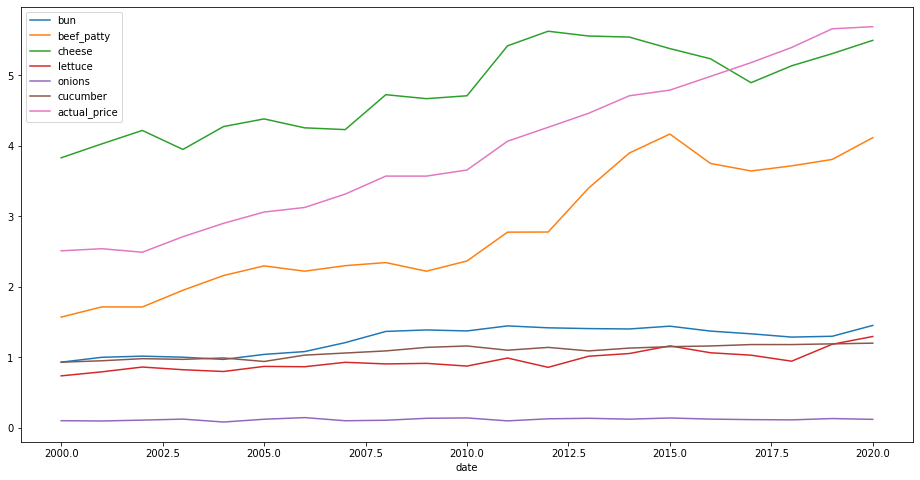

In [18]:
#checking the trend between individual ingredient prices an actual price of big mac
big_mac_cost_df.plot(kind='line',figsize=(16,8))

In [19]:
#Adjusting the ingridient price based on relative weight in a Big Mac 
big_mac_cost_df=big_mac_cost_df.assign(bun_weighted=bread_prices_cleaned[bread_prices_cleaned.index>1999]*0.163)
big_mac_cost_df=big_mac_cost_df.assign(beef_patty_weighted=beef_prices_cleaned[beef_prices_cleaned.index>1999]*0.198)
big_mac_cost_df=big_mac_cost_df.assign(cheese_weighted=cheese_prices_cleaned[cheese_prices_cleaned.index>1999]*0.03)
big_mac_cost_df=big_mac_cost_df.assign(lettuce_weighted=lettuce_prices_cleaned[lettuce_prices_cleaned.index>1999]*0.062)
big_mac_cost_df=big_mac_cost_df.assign(cucumber_weighted=cucumber_prices_cleaned[cucumber_prices_cleaned.index>1999]*0.015)
big_mac_cost_df=big_mac_cost_df.assign(onions_weighted=onion_prices_cleaned[onion_prices_cleaned.index>1999].get('prices')*0.015)

In [20]:
#Finding the total annual cost of all ingridients in a Big Mac
big_mac_cost_df=big_mac_cost_df.assign(total_cost=big_mac_cost_df.get(['bun_weighted','beef_patty_weighted','cheese_weighted','lettuce_weighted','onions_weighted','cucumber_weighted']).sum(axis=1))

Text(0.5, 1.0, 'Approximate Ingredient Price and Actual Price')

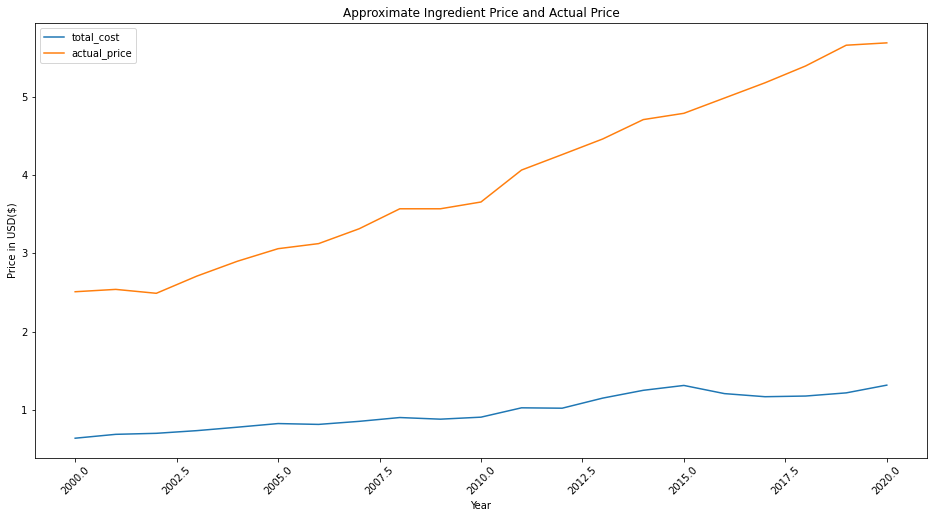

In [21]:
#Creating a visualization to gauge the Approximate Ingridient Price and Actual Price over the years.
big_mac_cost_df.get(['total_cost','actual_price']).plot(kind='line',figsize=(16,8))
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Price in USD($)')
plt.title('Approximate Ingredient Price and Actual Price')

In [22]:
#Creating a column for percentage change in Total and Actual Price from the previous year.
big_mac_cost_df=big_mac_cost_df.assign(total_cost_change=big_mac_cost_df.get('total_cost').pct_change())
big_mac_cost_df=big_mac_cost_df.assign(actual_price_change=big_mac_cost_df.get('actual_price').pct_change())

Text(0.5, 1.0, 'Annual change in Approximate Ingredient Price and Actual Price')

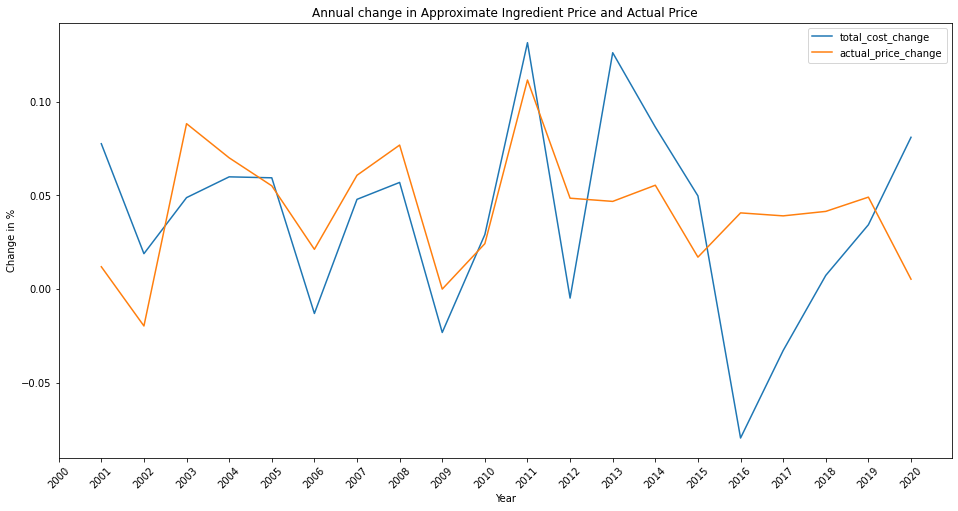

In [23]:
#Plotting the Precentage change in Approximate Price and Actual Price.
big_mac_cost_df[big_mac_cost_df.index<2021].get(['total_cost_change','actual_price_change']).plot(kind='line',figsize=(16,8))
values=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Change in %')
plt.title('Annual change in Approximate Ingredient Price and Actual Price')

Text(0.5, 1.0, 'Inflation v/s Annual change in Approximate Ingredient Price and Actual Price')

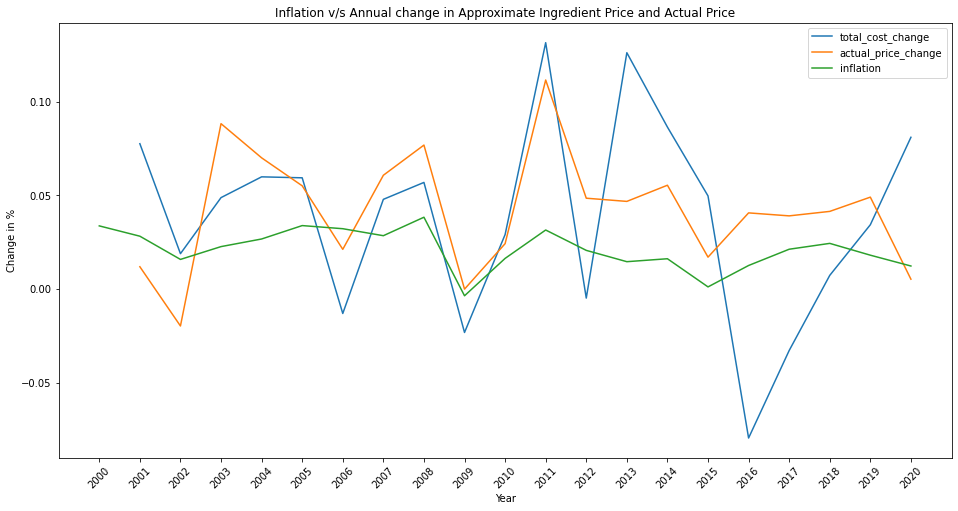

In [24]:
#Plotting a graph for Inflation v/s Calculated cost v/s Actual Price
big_mac_cost_df=big_mac_cost_df.assign(inflation=inflation_cleaned[inflation_cleaned.index>1999])
big_mac_cost_df[big_mac_cost_df.index<2021].get(['total_cost_change','actual_price_change','inflation']).plot(kind='line',figsize=(16,8))
plt.xticks(rotation = 45)
values=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Change in %')
plt.title('Inflation v/s Annual change in Approximate Ingredient Price and Actual Price')

Text(0.5, 1.0, 'GDP v/s Approximate Ingredient Price v/s Actual Price')

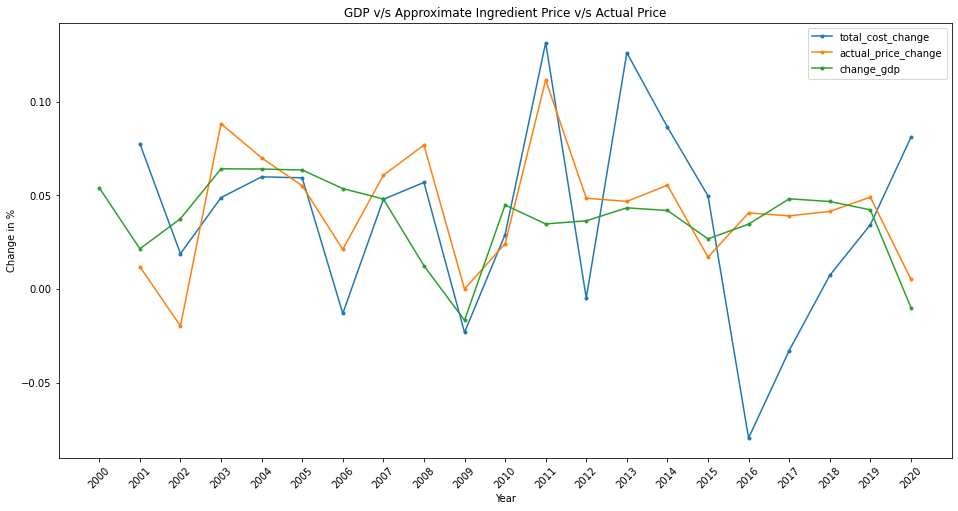

In [40]:
#Plotting a visualization for Annual Percentage Change in GDP, Ingridient Price and Actual Price
big_mac_cost_df=big_mac_cost_df.assign(change_gdp=gdp_clean[gdp_clean.index>1999].get('change_GDP'))
values=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
big_mac_cost_df.get(['total_cost_change','actual_price_change','change_gdp']).plot(kind='line',figsize=(16,8),marker='.')
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Change in %')
plt.title('GDP v/s Approximate Ingredient Price v/s Actual Price')

Text(0.5, 1.0, 'Ingredients v/s Actual Price')

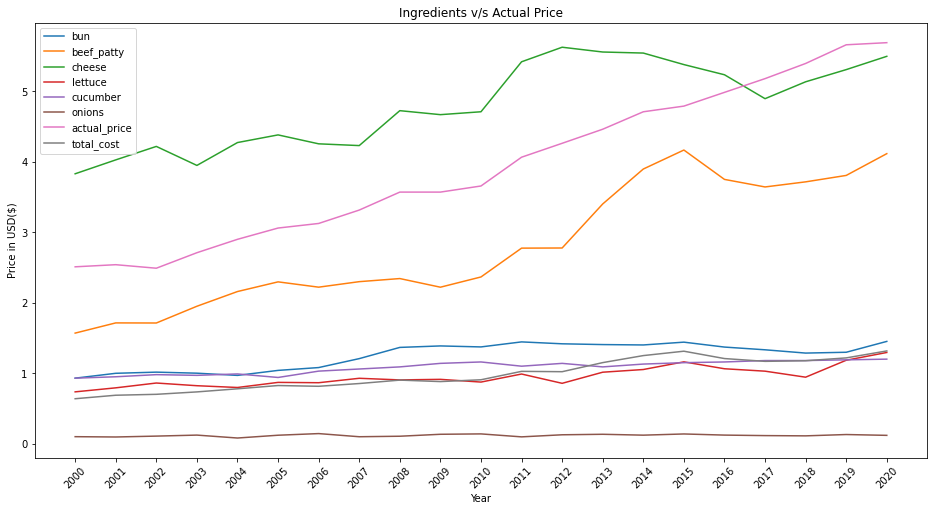

In [41]:
#Creating a visualization for comparing rise in Ingridients an Actual price
big_mac_cost_df.get(['bun','beef_patty','cheese','lettuce','cucumber','onions','actual_price','total_cost']).plot(kind='line',figsize=(16,8))
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Price in USD($)')
plt.title('Ingredients v/s Actual Price')

In [44]:
#20 Year Percentage change in total cost.
(big_mac_cost_df.get('total_cost').loc[2020]-big_mac_cost_df.get('total_cost').loc[2000])/big_mac_cost_df.get('total_cost').loc[2000]

1.0622437347520226

In [45]:
#20 year precent change in Actual Price
(big_mac_cost_df.get('actual_price').loc[2020]-big_mac_cost_df.get('actual_price').loc[2000])/big_mac_cost_df.get('actual_price').loc[2000]

1.2669322709163346

In [46]:
#Percentage change in Beef Prices in the Year 2022
beef_prices_cleaned.get('prices').pct_change().loc[2022]

0.06077348066298338

In [47]:
#Finding the correlation between total_cost and actual_price
big_mac_cost_df.get(['total_cost','actual_price']).corr()

,total_cost,actual_price
total_cost,1.000000,0.961486
actual_price,0.961486,1.000000


In [48]:
#Finding the correlation between total_cost_change, actual_price_change and inflation
big_mac_cost_df.get(['total_cost_change','actual_price_change','inflation']).corr()

,total_cost_change,actual_price_change,inflation
total_cost_change,1.000000,0.374229,0.251805
actual_price_change,0.374229,1.000000,0.563002
inflation,0.251805,0.563002,1.000000


Text(0.5, 1.0, 'SPY v/s % change in Actual Price v/s % change in Total Cost')

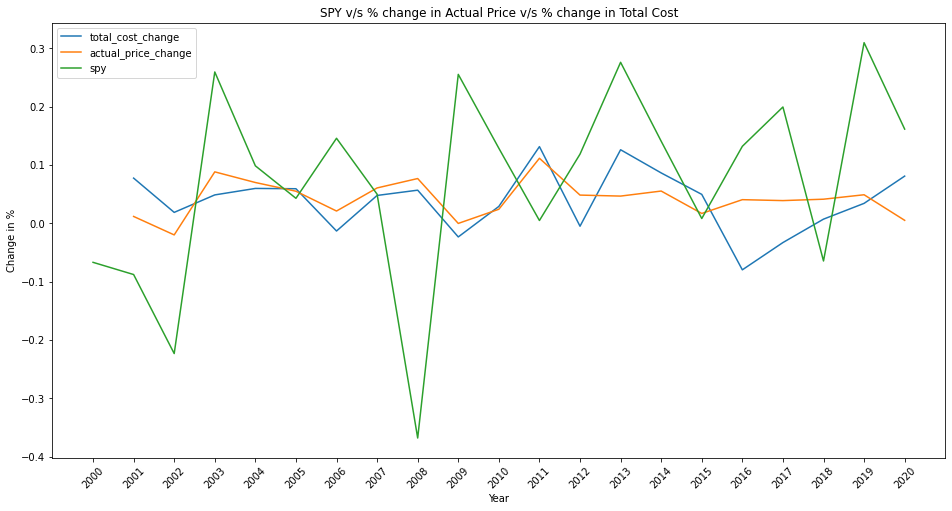

In [38]:
#Visualization to gauge the change in S&P500, Actual Price and Total Cost
big_mac_cost_df.get(['total_cost_change','actual_price_change','spy']).plot(kind='line',figsize=(16,8))
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Change in %')
plt.title('SPY v/s % change in Actual Price v/s % change in Total Cost')

Text(0.5, 1.0, '20 Year change in actual and calculated price')

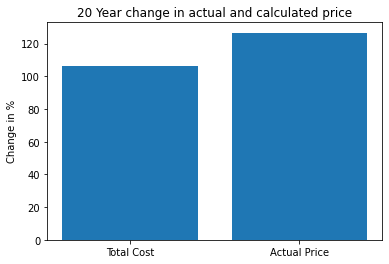

In [54]:
#Plotting a bar chart to gauge the difference in 20-year change in actual and calculated price.
twenty_year_change=[(big_mac_cost_df.get('total_cost').loc[2020]-big_mac_cost_df.get('total_cost').loc[2000])/big_mac_cost_df.get('total_cost').loc[2000]*100, (big_mac_cost_df.get('actual_price').loc[2020]-big_mac_cost_df.get('actual_price').loc[2000])/big_mac_cost_df.get('actual_price').loc[2000]*100]
plt.bar(height=twenty_year_change,x=['Total Cost','Actual Price'])
plt.ylabel('Change in %')
plt.title('20 Year change in actual and calculated price')

In [55]:
#20 Year change in S&P500
(spy.iloc[-1].get('High')-spy.iloc[0].get('Low'))/spy.iloc[0].get('Low')

1.6040660549929409

Text(0.5, 1.0, '20 Year change in SPY, actual and calculated price')

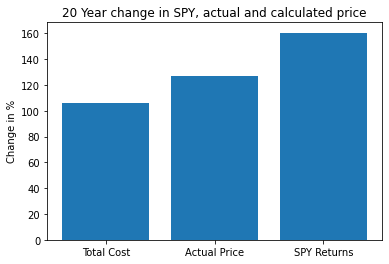

In [57]:
#Bar Chart to gauge the overall 20 year percentage change in actual and calculated price along with S&P500
twenty_year_change=[(big_mac_cost_df.get('total_cost').loc[2020]-big_mac_cost_df.get('total_cost').loc[2000])/big_mac_cost_df.get('total_cost').loc[2000]*100, (big_mac_cost_df.get('actual_price').loc[2020]-big_mac_cost_df.get('actual_price').loc[2000])/big_mac_cost_df.get('actual_price').loc[2000]*100, (spy.iloc[-1].get('High')-spy.iloc[0].get('Low'))/spy.iloc[0].get('Low')*100]
plt.bar(height=twenty_year_change,x=['Total Cost','Actual Price','SPY Returns'])
plt.ylabel('Change in %')
plt.title('20 Year change in SPY, actual and calculated price')

In [63]:
#Calculating change in annual stock price of mcdonalds
mcd_change=[]
for i in range(2000,2021):
    mcd_change.append((mcd_cleaned[mcd_cleaned.get('year')==i].iloc[-1].get('High')-mcd_cleaned[mcd_cleaned.get('year')==i].iloc[0].get('Low'))/mcd_cleaned[mcd_cleaned.get('year')==i].iloc[0].get('Low'))

In [64]:
big_mac_cost_df=big_mac_cost_df.assign(MCD=mcd_change)

Text(0.5, 1.0, 'SPY v/s % change in Actual Price v/s % change in Total Cost')

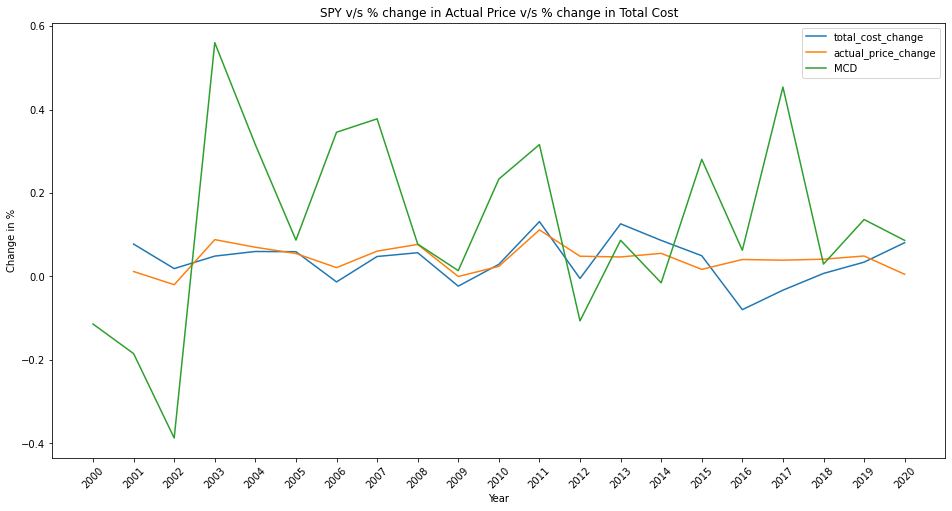

In [68]:
#Plotting a line graph to gauge the %change in SPY, Actual Price and Total Cost
big_mac_cost_df.get(['total_cost_change','actual_price_change','MCD']).plot(kind='line',figsize=(16,8))
plt.xticks(values,rotation = 45)
plt.xlabel('Year')
plt.ylabel('Change in %')
plt.title('SPY v/s % change in Actual Price v/s % change in Total Cost')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ff0145a-602a-4f7c-94d9-ad86e648b102' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>